# Create synthetic Data

In [ ]:
#!pip install faker

In [105]:
import pandas as pd
import numpy as np
from faker import Faker ## for simulate data
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
fake = Faker('en_IN')

In [107]:
def generate_random_date(start_date, end_date):
    return fake.date_between_dates(date_start=start_date, date_end=end_date)

In [108]:
num_rows = 1000
columns = ['empcode', 'dept', 'title', 'name', 'DOJ', 'DOB', 'age', 'gender', 'cadre', 'salary','experience']
data = []

In [109]:
for _ in range(num_rows):
    empcode = fake.unique.random_number(digits=5)
    dept = fake.random_element(elements=('IB', 'RM', 'BPM'))
    title = fake.random_element(elements=('Mr.', 'Ms.', 'Dr.'))
    name = fake.name()
    doj = generate_random_date(datetime(2020, 1, 1), datetime(2023, 1, 1)).strftime('%Y-%m-%d')
    dob = generate_random_date(datetime(1960, 1, 1), datetime(2000, 1, 1)).strftime('%Y-%m-%d')
    age = fake.random_int(min=22, max=60)
    gender = fake.random_element(elements=('Male', 'Female'))
    cadre = fake.random_element(elements=('Professor', 'Associate Professor', 'Assistant Professor'))
    salary = fake.random_int(min=40000, max=120000)
    experience = fake.random_int(min=5, max=100)  #months
    data.append([empcode, dept, title, name, doj, dob, age, gender, cadre, salary, experience])
df = pd.DataFrame(data, columns=columns)

In [110]:
df.head()

,empcode,dept,title,name,DOJ,DOB,age,gender,cadre,salary,experience
0,81570,BPM,Mr.,Alia Dutta,2022-12-07,1978-06-08,40,Male,Associate Professor,57385,25
1,26220,RM,Mr.,Vedika Sarraf,2022-10-09,1977-06-21,59,Male,Associate Professor,46476,90
2,40210,IB,Ms.,Uthkarsh Jani,2022-02-19,1998-05-20,41,Female,Assistant Professor,55036,45
3,27651,BPM,Dr.,Taimur Chad,2021-08-14,1997-01-14,40,Male,Associate Professor,118859,51
4,88094,IB,Ms.,Amani Shenoy,2020-09-15,1982-06-15,26,Male,Assistant Professor,118151,10


In [111]:
df.shape #row, cols

(1000, 11)

In [ ]:
# crosstab

In [112]:
pd.crosstab(index=df.dept, columns=df.gender, margins=True, normalize=True)

gender,Female,Male,All
dept,,,
BPM,0.174,0.155,0.329
IB,0.183,0.164,0.347
RM,0.186,0.138,0.324
All,0.543,0.457,1.000


In [115]:
pd.crosstab(index=df.dept, columns=df.gender, values=df.salary, aggfunc='mean', margins=True).round()  #normalise = columns, index

gender,Female,Male,All
dept,,,
BPM,76552.0,78647.0,77539.0
IB,82964.0,79522.0,81337.0
RM,80753.0,79074.0,80038.0
All,80152.0,79090.0,79667.0


In [ ]:
# pivot table

In [116]:
pd.pivot_table(data=df, values='salary', index='dept', columns='gender', aggfunc='max').round()

gender,Female,Male
dept,,
BPM,119682,119655
IB,119610,119913
RM,119748,119986


In [126]:
df.groupby(['dept','gender'], as_index=False).agg(meanSal = ('salary','mean'), maxSal = ('salary','max'), sdSal=('salary','std'), minSal = ('salary','min'), \
                                                  countStaff = ('empcode','count')).round()

,dept,gender,meanSal,maxSal,sdSal,minSal,countStaff
0,BPM,Female,76552.0,119682,22496.0,40028,174
1,BPM,Male,78647.0,119655,21753.0,41169,155
2,IB,Female,82964.0,119610,23768.0,40337,183
3,IB,Male,79522.0,119913,23236.0,40127,164
4,RM,Female,80753.0,119748,22407.0,40028,186
5,RM,Male,79074.0,119986,22934.0,40472,138


# Employee Attend - monthwise
- to explain long - wide data
- make few plots and labels

In [168]:
num_rows = 1000
columns = ['empcode', 'dept', 'title', 'name', 'gender', 'jan','feb','mar','apr','may']
data = []

In [169]:
fake.unique.random_number(digits=5)

82243

In [170]:
for _ in range(num_rows):
    empcode = fake.unique.random_number(digits=5)
    dept = fake.random_element(elements=('IB', 'RM', 'BPM'))
    title = fake.random_element(elements=('Mr.', 'Ms.', 'Dr.'))
    gender = fake.random_element(elements=('M', 'F'))
    name = fake.name()
    jan = fake.random_int(min=15, max=25)
    feb = fake.random_int(min=10, max=20)
    mar = fake.random_int(min=15, max=22)
    apr = fake.random_int(min=10, max=27)
    may = fake.random_int(min=15, max=25)
    data.append([empcode, dept, title, name , gender, jan, feb, mar,apr, may])
df1 = pd.DataFrame(data, columns=columns)

In [171]:
df1.head()

,empcode,dept,title,name,gender,jan,feb,mar,apr,may
0,27312,BPM,Ms.,Renee Sant,M,17,10,16,17,18
1,73102,IB,Mr.,Renee Agrawal,M,23,10,22,24,25
2,32332,IB,Ms.,Aarav Ravel,M,18,12,22,16,21
3,9263,RM,Dr.,Sana Devan,M,19,11,16,20,24
4,92076,IB,Dr.,Kimaya Ramachandran,M,20,14,21,25,23


In [172]:
df1['total'] = df1['jan'] + df1['feb'] + df1['mar'] + df1['apr'] + df1['may']
df1.head()

,empcode,dept,title,name,gender,jan,feb,mar,apr,may,total
0,27312,BPM,Ms.,Renee Sant,M,17,10,16,17,18,78
1,73102,IB,Mr.,Renee Agrawal,M,23,10,22,24,25,104
2,32332,IB,Ms.,Aarav Ravel,M,18,12,22,16,21,89
3,9263,RM,Dr.,Sana Devan,M,19,11,16,20,24,90
4,92076,IB,Dr.,Kimaya Ramachandran,M,20,14,21,25,23,103


In [173]:
df1.describe(include='all')

,empcode,dept,title,name,gender,jan,feb,mar,apr,may,total
count,1000.000000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,3,3,998,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,BPM,Ms.,Ayesha Korpal,M,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,350,341,2,503,NaN,NaN,NaN,NaN,NaN,NaN
mean,50095.378000,NaN,NaN,NaN,NaN,20.058000,14.969000,18.602000,18.785000,20.147000,92.561000
std,28537.667049,NaN,NaN,NaN,NaN,3.217917,3.142278,2.332603,5.194204,3.226733,7.915361
min,19.000000,NaN,NaN,NaN,NaN,15.000000,10.000000,15.000000,10.000000,15.000000,69.000000
25%,25845.000000,NaN,NaN,NaN,NaN,17.000000,12.000000,16.000000,14.000000,17.000000,87.000000
50%,49532.000000,NaN,NaN,NaN,NaN,20.000000,15.000000,19.000000,19.000000,20.000000,93.000000
75%,74447.250000,NaN,NaN,NaN,NaN,23.000000,18.000000,21.000000,23.000000,23.000000,98.250000


# Melt
- pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)[source]
- employee : month : days
- Long to Wide

In [174]:
#df1.drop(columns='total', inplace=True)
df1 = df1.drop(columns='total')

In [175]:
df1   #wide

,empcode,dept,title,name,gender,jan,feb,mar,apr,may
0,27312,BPM,Ms.,Renee Sant,M,17,10,16,17,18
1,73102,IB,Mr.,Renee Agrawal,M,23,10,22,24,25
2,32332,IB,Ms.,Aarav Ravel,M,18,12,22,16,21
3,9263,RM,Dr.,Sana Devan,M,19,11,16,20,24
4,92076,IB,Dr.,Kimaya Ramachandran,M,20,14,21,25,23
...,...,...,...,...,...,...,...,...,...,...
995,12965,IB,Mr.,Miraan Lala,M,17,10,20,15,25
996,90268,BPM,Dr.,Vardaniya Dhingra,M,24,10,16,23,25
997,80436,IB,Ms.,Miraya Guha,M,16,16,18,11,25
998,78520,BPM,Ms.,Nehmat Tiwari,F,15,18,16,21,19


In [177]:
df1Long = pd.melt(frame=df1, id_vars = ['empcode','dept', 'title','name','gender'], var_name='month', value_name='days')
df1Long  #long

,empcode,dept,title,name,gender,month,days
0,27312,BPM,Ms.,Renee Sant,M,jan,17
1,73102,IB,Mr.,Renee Agrawal,M,jan,23
2,32332,IB,Ms.,Aarav Ravel,M,jan,18
3,9263,RM,Dr.,Sana Devan,M,jan,19
4,92076,IB,Dr.,Kimaya Ramachandran,M,jan,20
...,...,...,...,...,...,...,...
4995,12965,IB,Mr.,Miraan Lala,M,may,25
4996,90268,BPM,Dr.,Vardaniya Dhingra,M,may,25
4997,80436,IB,Ms.,Miraya Guha,M,may,25
4998,78520,BPM,Ms.,Nehmat Tiwari,F,may,19


In [178]:
print(df1.shape, df1Long.shape)  #wide to Long

(1000, 10) (5000, 7)


In [181]:
attSum1 = df1Long.groupby(['dept','month','gender'])['days'].mean().round().reset_index()
attSum1.head()

,dept,month,gender,days
0,BPM,apr,F,19.0
1,BPM,apr,M,19.0
2,BPM,feb,F,15.0
3,BPM,feb,M,15.0
4,BPM,jan,F,20.0


In [184]:
attSum1.sort_values(by='days',ascending=False).head(5)

,dept,month,gender,days
9,BPM,may,M,21.0
15,IB,jan,M,20.0
28,RM,may,F,20.0
25,RM,jan,M,20.0
24,RM,jan,F,20.0


In [186]:
df1Long.groupby(['dept','month'])['days'].min().round().reset_index()

,dept,month,days
0,BPM,apr,10
1,BPM,feb,10
2,BPM,jan,15
3,BPM,mar,15
4,BPM,may,15
5,IB,apr,10
6,IB,feb,10
7,IB,jan,15
8,IB,mar,15
9,IB,may,15


In [188]:
df1Long.groupby(['dept','month']).agg({'days':['min','max', 'mean']}).round().reset_index()

dept month days          
               min max  mean
0   BPM   apr   10  27  19.0
1   BPM   feb   10  20  15.0
2   BPM   jan   15  25  20.0
3   BPM   mar   15  22  19.0
4   BPM   may   15  25  20.0
5    IB   apr   10  27  19.0
6    IB   feb   10  20  15.0
7    IB   jan   15  25  20.0
8    IB   mar   15  22  19.0
9    IB   may   15  25  20.0
10   RM   apr   10  27  18.0
11   RM   feb   10  20  15.0
12   RM   jan   15  25  20.0
13   RM   mar   15  22  18.0
14   RM   may   15  25  20.0

In [190]:
df1Long.groupby(['name']).agg({'days':['min','max', 'mean','sum']}).round().reset_index()

name days               
                      min max  mean  sum
0       Aaina Gulati   15  24  19.0   95
1         Aaina Kota   16  26  19.0   93
2    Aaina Rajagopal   15  22  18.0   92
3       Aaina Thakur   15  22  18.0   90
4       Aarav Chanda   16  24  19.0   97
..               ...  ...  ..   ...  ...
993    Zeeshan Sahni   11  23  18.0   90
994       Zoya Boase   14  27  20.0  100
995        Zoya Dass   15  24  20.0   99
996        Zoya Gaba   11  25  18.0   88
997       Zoya Raman   12  18  16.0   78

[998 rows x 5 columns]

In [207]:
attSum2 = df1Long.groupby(['dept','name'],as_index=False).agg(totaldays = ('days','sum')).round()
attSum2

,dept,name,totaldays
0,BPM,Aaina Thakur,90
1,BPM,Aarav Chanda,97
2,BPM,Aarav Choudhary,94
3,BPM,Aarav Desai,89
4,BPM,Aarna Bala,107
...,...,...,...
995,RM,Zaina Verma,93
996,RM,Zara Kata,95
997,RM,Zeeshan Lalla,92
998,RM,Zoya Boase,100


In [211]:
#attSum2.sort_values(by=['dept','totaldays']).groupby('dept').nlargest(3, columns='totaldays')

In [212]:
attSum2.sort_values(by=['dept','totaldays'], ascending=[True,False]).nlargest(2, columns='totaldays')

,dept,name,totaldays
79,BPM,Chirag Sama,116
526,IB,Nakul Sengupta,113


In [214]:
df1Long.head() #long data

,empcode,dept,title,name,gender,month,days
0,27312,BPM,Ms.,Renee Sant,M,jan,17
1,73102,IB,Mr.,Renee Agrawal,M,jan,23
2,32332,IB,Ms.,Aarav Ravel,M,jan,18
3,9263,RM,Dr.,Sana Devan,M,jan,19
4,92076,IB,Dr.,Kimaya Ramachandran,M,jan,20


In [215]:
print(df1.shape, df1Long.shape)
#back to Wide

(1000, 10) (5000, 7)


In [220]:
df1.head()

,empcode,dept,title,name,gender,jan,feb,mar,apr,may
0,27312,BPM,Ms.,Renee Sant,M,17,10,16,17,18
1,73102,IB,Mr.,Renee Agrawal,M,23,10,22,24,25
2,32332,IB,Ms.,Aarav Ravel,M,18,12,22,16,21
3,9263,RM,Dr.,Sana Devan,M,19,11,16,20,24
4,92076,IB,Dr.,Kimaya Ramachandran,M,20,14,21,25,23


# Long to Wide
- df1M2.pivot(columns='month',values='attendance', index=['empID','name','dept','gender'])
-  DataFrame.pivot(*, columns, index=_NoDefault.no_default, values=_NoDefault.no_default)
-  df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

In [239]:
df1Wide = df1Long.pivot(columns='month', values='days', index=['empcode', 'dept', 'title', 'name','gender']) #.rename(columns={'month':'serial'})

In [240]:
df1Wide.head()

,,,,month,apr,feb,jan,mar,may
empcode,dept,title,name,gender,,,,,
19,IB,Dr.,Purab Sridhar,M,20,16,15,15,16
63,BPM,Dr.,Aarav Chanda,F,24,18,16,19,20
315,BPM,Mr.,Kismat Tiwari,M,13,11,22,18,21
342,IB,Dr.,Zaina Mammen,M,16,15,16,20,18
358,BPM,Dr.,Lakshit Sarkar,M,21,20,25,21,19


In [241]:
#set columns in order and reset into flat data frame

In [242]:
df1.head()

,empcode,dept,title,name,gender,jan,feb,mar,apr,may
0,27312,BPM,Ms.,Renee Sant,M,17,10,16,17,18
1,73102,IB,Mr.,Renee Agrawal,M,23,10,22,24,25
2,32332,IB,Ms.,Aarav Ravel,M,18,12,22,16,21
3,9263,RM,Dr.,Sana Devan,M,19,11,16,20,24
4,92076,IB,Dr.,Kimaya Ramachandran,M,20,14,21,25,23


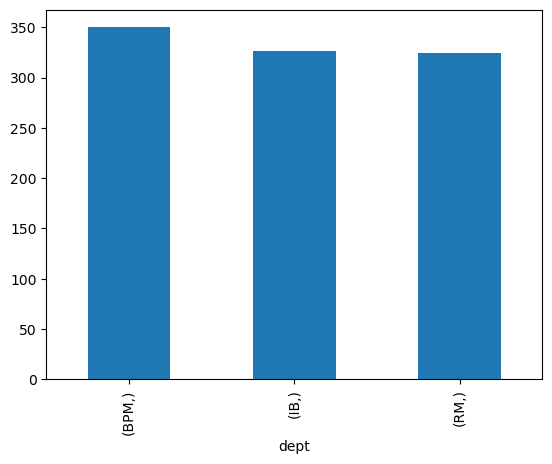

In [244]:
df1[['dept']].value_counts().plot(kind='bar')
plt.show();

In [245]:
deptCount = df1.groupby('dept', as_index=False).agg(count=('dept', 'count'))
deptCount

,dept,count
0,BPM,350
1,IB,326
2,RM,324


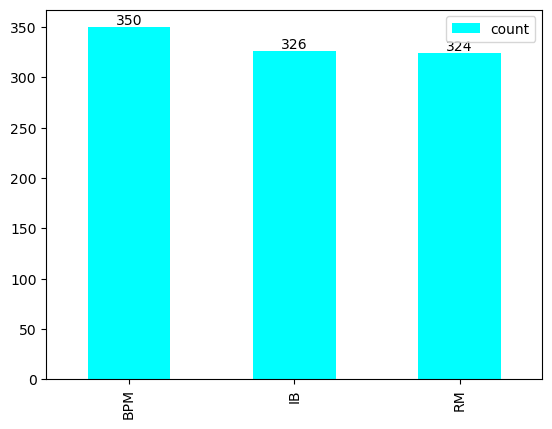

In [248]:
ax = deptCount.plot(kind='bar', color='cyan')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_xticks(np.arange(3), ['BPM', 'IB', 'RM'])  # Set text labels.
plt.show();

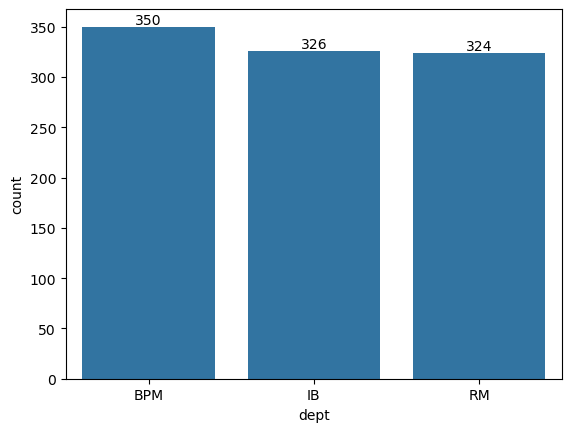

In [249]:
#seaborn
fig, ax= plt.subplots()
sns.barplot(data=deptCount, x='dept', y='count', ax=ax)
ax.bar_label(ax.containers[0])
plt.show();

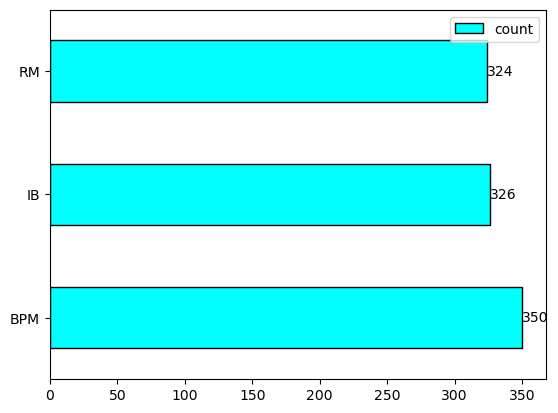

In [250]:
ax = deptCount.plot(kind='barh', color='cyan', edgecolor='black')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_yticks(np.arange(3), ['BPM', 'IB', 'RM'])  # Set text labels.
plt.show()

In [251]:
deptCount

,dept,count
0,BPM,350
1,IB,326
2,RM,324


fig, ax = plt.subplots()


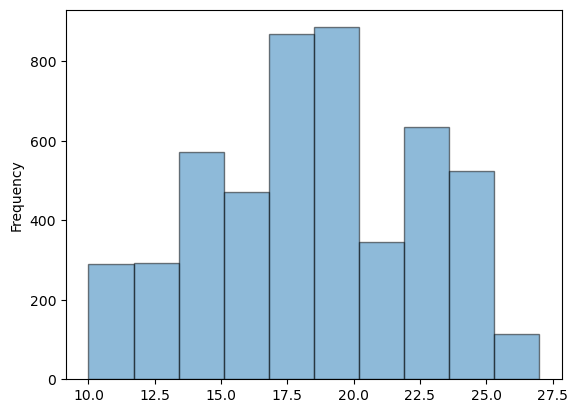

In [252]:
df1Long['days'].plot.hist(alpha=0.5, edgecolor='black')
plt.show();

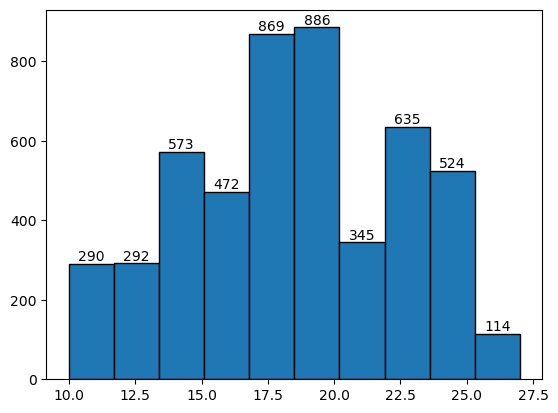

In [253]:
#dfLong['attendance'].plot.hist(alpha=0.5, edgecolor='black')
values, bins, bars= plt.hist(df1Long['days'], edgecolor='black')
plt.bar_label(bars)
plt.show();

In [254]:
df1Long

,empcode,dept,title,name,gender,month,days
0,27312,BPM,Ms.,Renee Sant,M,jan,17
1,73102,IB,Mr.,Renee Agrawal,M,jan,23
2,32332,IB,Ms.,Aarav Ravel,M,jan,18
3,9263,RM,Dr.,Sana Devan,M,jan,19
4,92076,IB,Dr.,Kimaya Ramachandran,M,jan,20
...,...,...,...,...,...,...,...
4995,12965,IB,Mr.,Miraan Lala,M,may,25
4996,90268,BPM,Dr.,Vardaniya Dhingra,M,may,25
4997,80436,IB,Ms.,Miraya Guha,M,may,25
4998,78520,BPM,Ms.,Nehmat Tiwari,F,may,19


In [255]:
df1Wide

,,,,month,apr,feb,jan,mar,may
empcode,dept,title,name,gender,,,,,
19,IB,Dr.,Purab Sridhar,M,20,16,15,15,16
63,BPM,Dr.,Aarav Chanda,F,24,18,16,19,20
315,BPM,Mr.,Kismat Tiwari,M,13,11,22,18,21
342,IB,Dr.,Zaina Mammen,M,16,15,16,20,18
358,BPM,Dr.,Lakshit Sarkar,M,21,20,25,21,19
...,...,...,...,...,...,...,...,...,...
98750,BPM,Mr.,Sana Batta,F,21,18,21,19,17
99238,IB,Ms.,Sara Chanda,M,13,17,16,21,17
99736,RM,Ms.,Anaya Khurana,M,14,12,18,17,24


In [256]:
deptSum = df1[['dept']].value_counts()
deptSum

dept
BPM     350
IB      326
RM      324
Name: count, dtype: int64

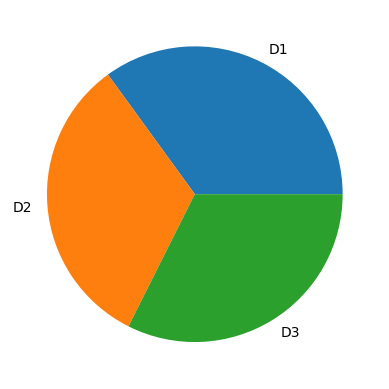

In [258]:
plt.pie(deptSum, labels=['D1','D2','D3'])
plt.show()

In [ ]:
#help(plt.pie)

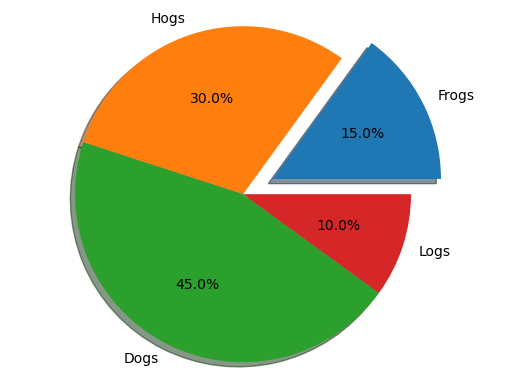

In [262]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
explode = (0.2, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',  shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show();

# Links
- https://www.w3schools.com/python/matplotlib_pie_charts.asp